In [4]:
%pwd

'/content'

In [1]:
%pip install pandas torch scikit-learn matplotlib seaborn imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/hw1_creditcard_dataset.csv')
x = df
y = df['Class']

In [4]:
print("Dataset Information:")
print(f"Feature matrix shape (x): {x.shape}")
print(f"Target vector shape (y): {y.shape}")
print("\nClass distribution in y:")
print(y.value_counts(normalize=True).round(4) * 100, "% of total")

print("\nFeature Statistics:")
print(x.describe())

Dataset Information:
Feature matrix shape (x): (99999, 31)
Target vector shape (y): (99999,)

Class distribution in y:
Class
0    99.72
1     0.28
Name: proportion, dtype: float64 % of total

Feature Statistics:
                  id            V1            V2            V3            V4  \
count   99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean   143402.769828      0.506266     -0.489546      0.676707     -0.729576   
std     83484.408976      0.825769      0.690404      0.704722      0.671812   
min         0.000000     -3.218534    -40.194965     -3.183760     -4.833530   
25%     71627.000000     -0.137424     -0.659666      0.144500     -1.075606   
50%    143201.000000      0.215207     -0.423057      0.564872     -0.633652   
75%    214269.000000      1.089677     -0.187172      1.100016     -0.310324   
max    567657.000000      2.219470      4.171062      4.440555      3.201536   

                 V5            V6            V7            V8      

In [16]:
X = x

X_remaining, X_predict = train_test_split(
    X,
    test_size=5e-3,
    random_state=42,
)

X_train, X_test = train_test_split(
    X_remaining,
    test_size=0.2,
    random_state=42,
)

Y_train = X_train['Class']
Y_test = X_test['Class']

X_train = X_train.drop(['id', 'Class'], axis=1)
X_test = X_test.drop(['id', 'Class'], axis=1)

print(f"Total rows: {len(X)}")
print(f"Prediction set size (0.5%): {len(X_predict)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

print(f"Training set class distribution: {Y_train.value_counts(normalize=True).round(4) * 100, '% of total'}")
print(f"Testing set class distribution: {Y_test.value_counts(normalize=True).round(4) * 100, '% of total'}")

Total rows: 99999
Prediction set size (0.5%): 500
Training set size: 79599
Testing set size: 19900
Training set class distribution: (Class
0    99.73
1     0.27
Name: proportion, dtype: float64, '% of total')
Testing set class distribution: (Class
0    99.7
1     0.3
Name: proportion, dtype: float64, '% of total')


In [17]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
assert X_train.shape[1] == X_test.shape[1] and X_train.shape[0] == Y_train.shape[0] and X_test.shape[0] == Y_test.shape[0]


(79599, 29) (19900, 29) (79599,) (19900,)


In [18]:
train_features = StandardScaler().fit_transform(X_train)
test_features = StandardScaler().fit_transform(X_test)

In [19]:
train_features = torch.FloatTensor(train_features)
test_features = torch.FloatTensor(test_features)

try:
  Y_train = torch.FloatTensor(Y_train.values)
  Y_test = torch.FloatTensor(Y_test.values)

except:
  Y_train = torch.FloatTensor(Y_train)
  Y_test = torch.FloatTensor(Y_test)

class CreditCardNet(nn.Module):
    def __init__(self, input_dim, layer_sizes, dropout_rate=0.2):
        super(CreditCardNet, self).__init__()

        layers = []
        prev_size = input_dim

        for size in layer_sizes:
            layers.extend([
                nn.Linear(prev_size, size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

class TorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer_sizes=[29, 12], learning_rate=0.001,
                 num_epochs=100, batch_size=32):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size

    def _create_model(self, input_dim):
        model = CreditCardNet(
            input_dim=input_dim,
            layer_sizes=self.layer_sizes
        )
        return model

    def fit(self, X, y):
        X = torch.FloatTensor(X)
        y = torch.FloatTensor(y)

        # Create model and optimizer
        self.model = self._create_model(X.shape[1])
        self.optimizer = torch.optim.Adam(
            self.model.parameters(),
            lr=self.learning_rate
        )

        dataset = torch.utils.data.TensorDataset(X, y)
        train_loader = DataLoader(
            dataset,
            batch_size=self.batch_size,
            shuffle=True
        )

        criterion = nn.BCELoss()
        for epoch in range(self.num_epochs):
            self.model.train()
            total_loss = 0
            for batch_X, batch_y in train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y.unsqueeze(1))
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()

            if (epoch + 1) % 10 == 0:
                avg_loss = total_loss / len(train_loader)
                print(f'Epoch [{epoch+1}/{self.num_epochs}], Loss: {avg_loss:.4f}')

        return self

    def predict(self, X):
        X = torch.FloatTensor(X)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs > 0.5).float().squeeze().numpy()
        return predictions

# Define parameter grid
param_grid = {
    'layer_sizes': [
        [64, 32],           # 2 hidden layers
        [128, 64, 32],      # 3 hidden layers
        [256, 128, 64, 32], # 4 hidden layers
        [512, 256, 128],    # 3 hidden layers with more units
        [64, 64, 64]        # 3 equal-sized layers
    ],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Create and run GridSearchCV
model = TorchClassifierWrapper()
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=1,
    verbose=2
)


print("Starting grid search...")
grid_search.fit(train_features.numpy(), Y_train.numpy())

print("\nBest parameters found:")
print(grid_search.best_params_)
print("\nBest score:", grid_search.best_score_)

final_model = TorchClassifierWrapper(**grid_search.best_params_)
final_model.fit(train_features.numpy(), Y_train.numpy())

y_pred = final_model.predict(test_features.numpy())

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(Y_test.numpy(), y_pred))
print("\nClassification Report:")
print(classification_report(Y_test.numpy(), y_pred))

torch.save(final_model.model.state_dict(), '/content/best_credit_card_dnn_model.pth')

Starting grid search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch [10/50], Loss: 0.0018
Epoch [20/50], Loss: 0.0012
Epoch [30/50], Loss: 0.0008
Epoch [40/50], Loss: 0.0020
Epoch [50/50], Loss: 0.0008
[CV] END batch_size=32, layer_sizes=[256, 128, 64, 32], learning_rate=0.001, num_epochs=50; total time= 4.5min
Epoch [10/50], Loss: 0.0015
Epoch [20/50], Loss: 0.0015
Epoch [30/50], Loss: 0.0011
Epoch [40/50], Loss: 0.0037
Epoch [50/50], Loss: 0.0004
[CV] END batch_size=32, layer_sizes=[256, 128, 64, 32], learning_rate=0.001, num_epochs=50; total time= 4.4min
Epoch [10/50], Loss: 0.0014
Epoch [20/50], Loss: 0.0008
Epoch [30/50], Loss: 0.0004
Epoch [40/50], Loss: 0.0005
Epoch [50/50], Loss: 0.0015
[CV] END batch_size=32, layer_sizes=[256, 128, 64, 32], learning_rate=0.001, num_epochs=50; total time= 4.4min
Epoch [10/50], Loss: 0.0023
Epoch [20/50], Loss: 0.0017
Epoch [30/50], Loss: 0.0031
Epoch [40/50], Loss: 0.0008
Epoch [50/50], Loss: 0.0029

Best parameters found:


In [20]:
actual_labels = X_predict['Class'].values

X_predict_processed = StandardScaler().fit_transform(X_predict.drop(['id', 'Class'], axis=1))
X_predict_processed = torch.FloatTensor(X_predict_processed)

input_dim = X_predict_processed.shape[1]
model = CreditCardNet(input_dim=input_dim, layer_sizes=[256, 128, 64, 32])

model.load_state_dict(torch.load('/content/best_credit_card_dnn_model.pth'))

model.eval()
with torch.no_grad():
    predictions = model(X_predict_processed)
    predicted_labels = (predictions > 0.5).float().squeeze().numpy()


accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"\nAccuracy on prediction set: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(actual_labels, predicted_labels))



Accuracy on prediction set: 0.9980

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      0.50      0.67         2

    accuracy                           1.00       500
   macro avg       1.00      0.75      0.83       500
weighted avg       1.00      1.00      1.00       500


Confusion Matrix:
[[498   0]
 [  1   1]]


<ipython-input-20-2988203ccb70>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_credit_card_dnn_model.pth'))


In [21]:
X_train_np = train_features
X_test_np = test_features
y_train_np = Y_train
y_test_np = Y_test

# 1. Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_np, y_train_np)
lr_pred = lr_model.predict(X_test_np)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_np, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test_np, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_np, lr_pred))

# 2. Support Vector Machine
print("\nTraining SVM...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_np, y_train_np)
svm_pred = svm_model.predict(X_test_np)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test_np, svm_pred))
print("\nClassification Report:")
print(classification_report(y_test_np, svm_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_np, svm_pred))

# 3. Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_np, y_train_np)
rf_pred = rf_model.predict(X_test_np)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test_np, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test_np, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_np, rf_pred))

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.9989447236180905

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.91      0.72      0.80        60

    accuracy                           1.00     19900
   macro avg       0.96      0.86      0.90     19900
weighted avg       1.00      1.00      1.00     19900


Confusion Matrix:
[[19836     4]
 [   17    43]]

Training SVM...

SVM Results:
Accuracy: 0.9988944723618091

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.90      0.72      0.80        60

    accuracy                           1.00     19900
   macro avg       0.95      0.86      0.90     19900
weighted avg       1.00      1.00      1.00     19900


Confusion Matrix:
[[19835     5]
 [   17    43]]

Training Random Forest...

Random Forest Resul

In [22]:
model.eval()
with torch.no_grad():
    predictions = model(torch.FloatTensor(X_test_np))
    predicted_labels = (predictions > 0.5).float().squeeze().numpy()

nn_pred = predicted_labels

models_comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test_np, nn_pred), accuracy_score(y_test_np, lr_pred), accuracy_score(y_test_np, svm_pred), accuracy_score(y_test_np, rf_pred)],
    'Precision': [precision_score(y_test_np, nn_pred), precision_score(y_test_np, lr_pred), precision_score(y_test_np, svm_pred), precision_score(y_test_np, rf_pred)],
    'Recall': [recall_score(y_test_np, nn_pred), recall_score(y_test_np, lr_pred), recall_score(y_test_np, svm_pred), recall_score(y_test_np, rf_pred)],
    'F1 Score': [f1_score(y_test_np, nn_pred), f1_score(y_test_np, lr_pred), f1_score(y_test_np, svm_pred), f1_score(y_test_np, rf_pred)]
})

# Compare traditional models (LR, SVM, RF)
traditional_models = models_comparison.iloc[1:]
best_traditional = traditional_models.loc[traditional_models['F1 Score'].idxmax()]

# Compare all models including Neural Network
best_overall = models_comparison.loc[models_comparison['F1 Score'].idxmax()]

Model_Name = {0: 'Neural Network', 1: 'Logistic Regression', 2: 'SVM', 3: 'Random Forest'}

print("\nBest Traditional Model (among LR, SVM, RF):")
print(f"Model: {Model_Name[traditional_models['F1 Score'].idxmax()]}")
print(f"Accuracy: {best_traditional['Accuracy']:.4f}")
print(f"Precision: {best_traditional['Precision']:.4f}")
print(f"Recall: {best_traditional['Recall']:.4f}")
print(f"F1 Score: {best_traditional['F1 Score']:.4f}")

print("\nBest Overall Model:")
print(f"Model: {Model_Name[models_comparison['F1 Score'].idxmax()]}")
print(f"Accuracy: {best_overall['Accuracy']:.4f}")
print(f"Precision: {best_overall['Precision']:.4f}")
print(f"Recall: {best_overall['Recall']:.4f}")
print(f"F1 Score: {best_overall['F1 Score']:.4f}")


Best Traditional Model (among LR, SVM, RF):
Model: Random Forest
Accuracy: 0.9991
Precision: 0.9200
Recall: 0.7667
F1 Score: 0.8364

Best Overall Model:
Model: Random Forest
Accuracy: 0.9991
Precision: 0.9200
Recall: 0.7667
F1 Score: 0.8364


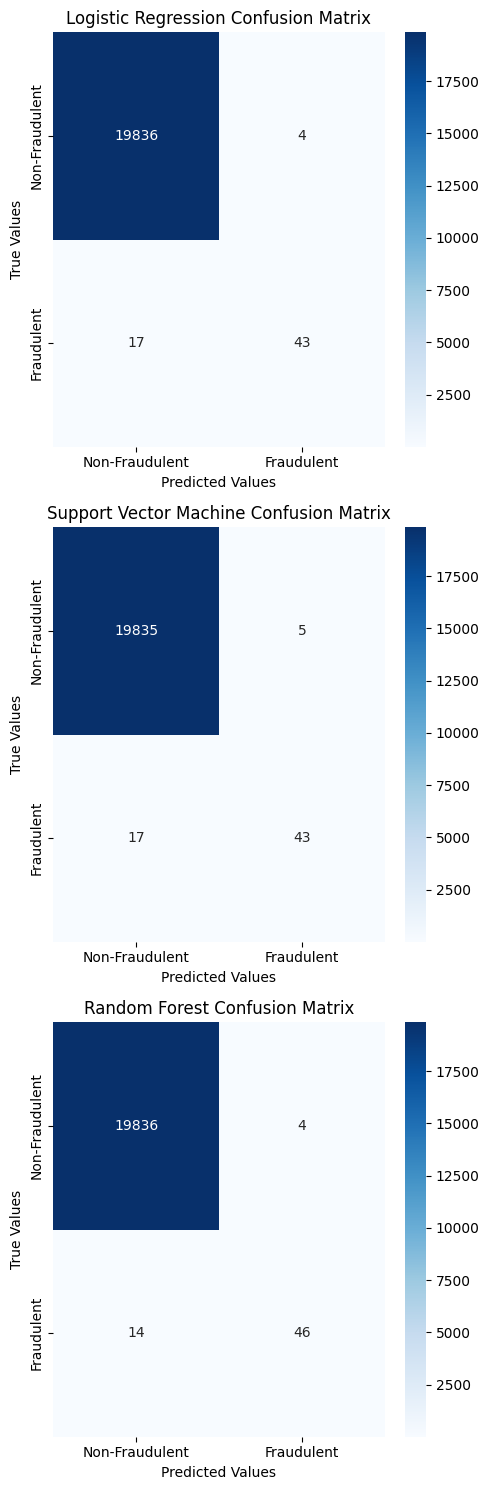

In [23]:
lr_cm = confusion_matrix(y_test_np, lr_pred)
svm_cm = confusion_matrix(y_test_np, svm_pred)
rf_cm = confusion_matrix(y_test_np, rf_pred)

fig, axes = plt.subplots(3, 1, figsize=(5, 15))

cms = [
       (lr_cm, "Logistic Regression"),
       (svm_cm, "Support Vector Machine"),
       (rf_cm, "Random Forest")]

labels = ['Non-Fraudulent', 'Fraudulent']

for (cm, title), ax in zip(cms, axes.flat):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=labels, yticklabels=labels)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')

plt.tight_layout()
# plt.savefig('/content/confusion_matrix.png')

Epoch [10/50]
Train Loss: 0.0013, Train Acc: 0.9996
Test Loss: 0.0087, Test Acc: 0.9992
Epoch [20/50]
Train Loss: 0.0009, Train Acc: 0.9997
Test Loss: 0.0111, Test Acc: 0.9993
Epoch [30/50]
Train Loss: 0.0006, Train Acc: 0.9998
Test Loss: 0.0114, Test Acc: 0.9992
Epoch [40/50]
Train Loss: 0.0006, Train Acc: 0.9998
Test Loss: 0.0108, Test Acc: 0.9993
Epoch [50/50]
Train Loss: 0.0005, Train Acc: 0.9998
Test Loss: 0.0199, Test Acc: 0.9992


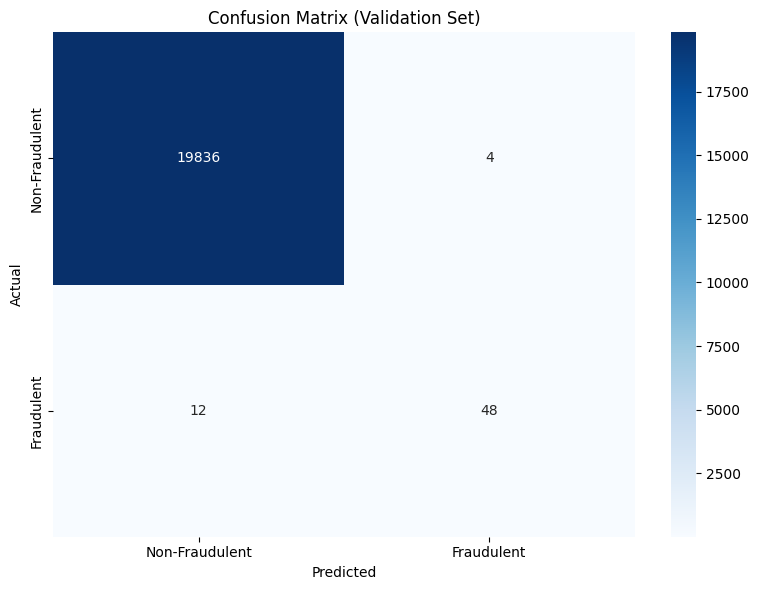


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.92      0.80      0.86        60

    accuracy                           1.00     19900
   macro avg       0.96      0.90      0.93     19900
weighted avg       1.00      1.00      1.00     19900



In [28]:
def train_model_with_history(model, train_features, Y_train, test_features, Y_test, epochs=50, batch_size=128):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_dataset = torch.utils.data.TensorDataset(
        torch.FloatTensor(train_features),
        torch.FloatTensor(Y_train)
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    history = {
        'train_loss': [],
        'test_loss': [],
        'train_acc': [],
        'test_acc': []
    }

    final_test_predictions = None

    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

            predicted = (outputs > 0.5).float().squeeze()
            train_correct += (predicted == batch_y).sum().item()
            train_total += batch_y.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = train_correct / train_total

        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.FloatTensor(test_features))
            test_loss = criterion(test_outputs, torch.FloatTensor(Y_test).unsqueeze(1))
            test_predicted = (test_outputs > 0.5).float().squeeze()
            test_accuracy = (test_predicted == torch.FloatTensor(Y_test)).sum().item() / len(Y_test)

            if epoch == epochs - 1:
                final_test_predictions = test_predicted.numpy()

        history['train_loss'].append(avg_train_loss)
        history['test_loss'].append(test_loss.item())
        history['train_acc'].append(train_accuracy)
        history['test_acc'].append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
            print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

    history['final_predictions'] = final_test_predictions
    return history

train_features_np = train_features.numpy() if isinstance(train_features, torch.Tensor) else train_features
test_features_np = test_features.numpy() if isinstance(test_features, torch.Tensor) else test_features
Y_train_np = Y_train.cpu().detach().numpy()
Y_test_np = Y_test.cpu().detach().numpy()

input_dim = train_features_np.shape[1]
best_layer_sizes = [256, 128, 64, 32]
model = CreditCardNet(input_dim=input_dim, layer_sizes=best_layer_sizes)
history = train_model_with_history(model, train_features_np, Y_train_np, test_features_np, Y_test_np)

cm = confusion_matrix(Y_test_np, history['final_predictions'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
# plt.savefig('./img/validation_confusion_matrix.png')
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test_np, history['final_predictions']))



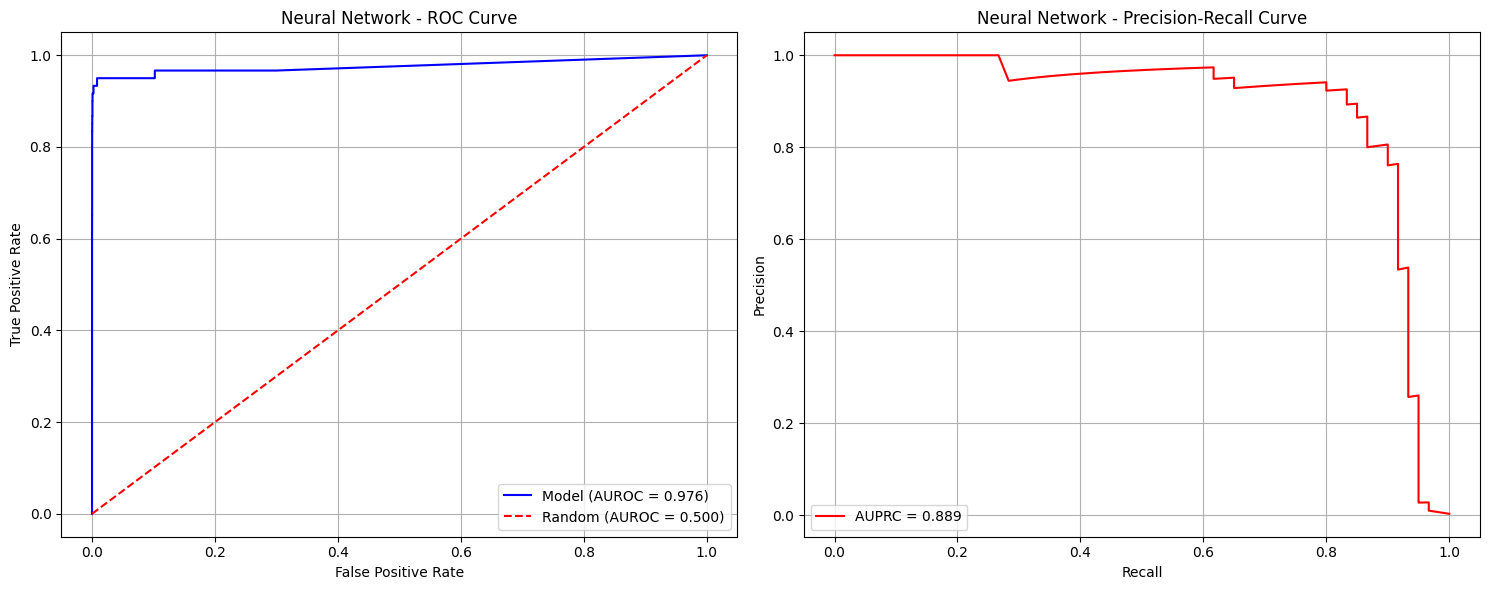


Neural Network:
AUROC: 0.9764
AUPRC: 0.8892


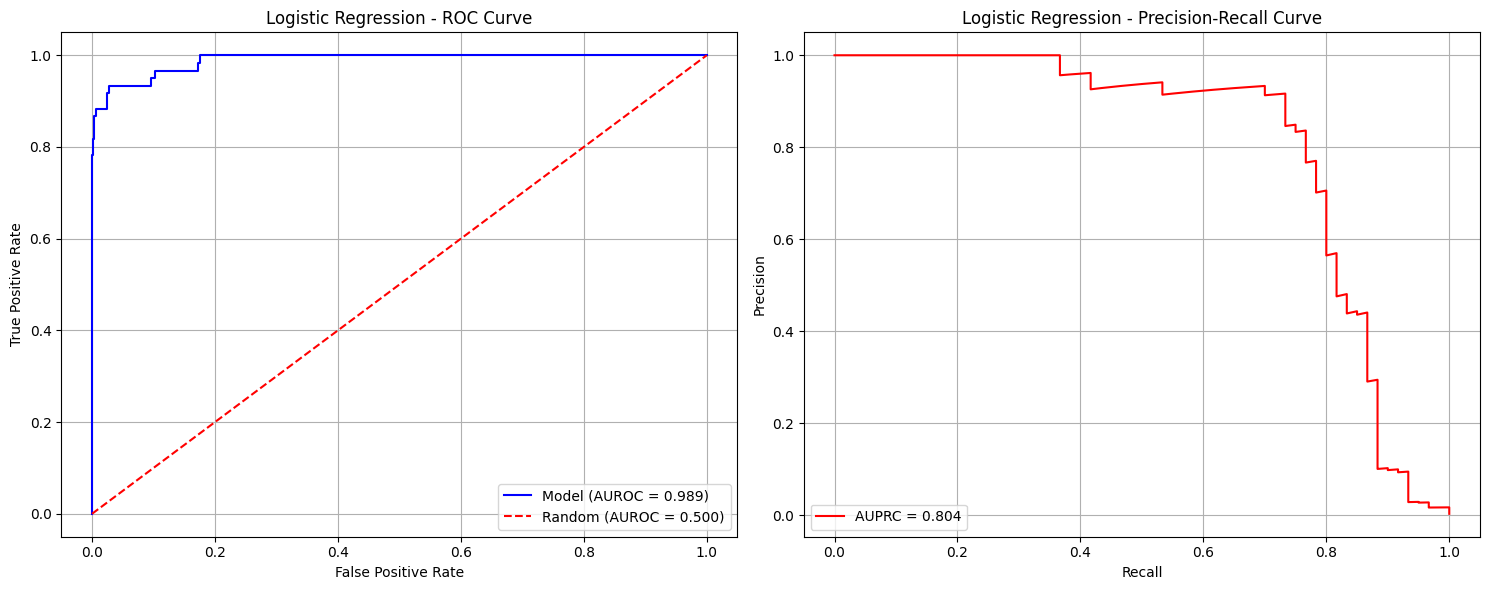


Logistic Regression:
AUROC: 0.9892
AUPRC: 0.8041


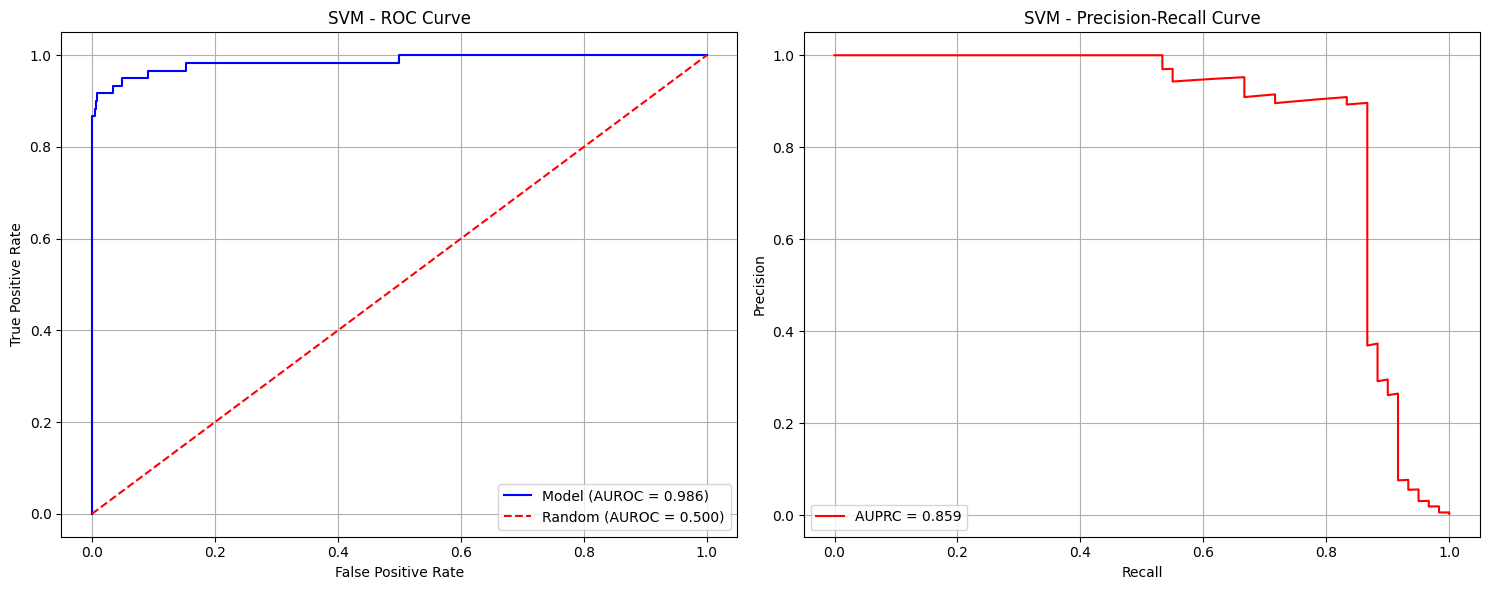


SVM:
AUROC: 0.9859
AUPRC: 0.8594


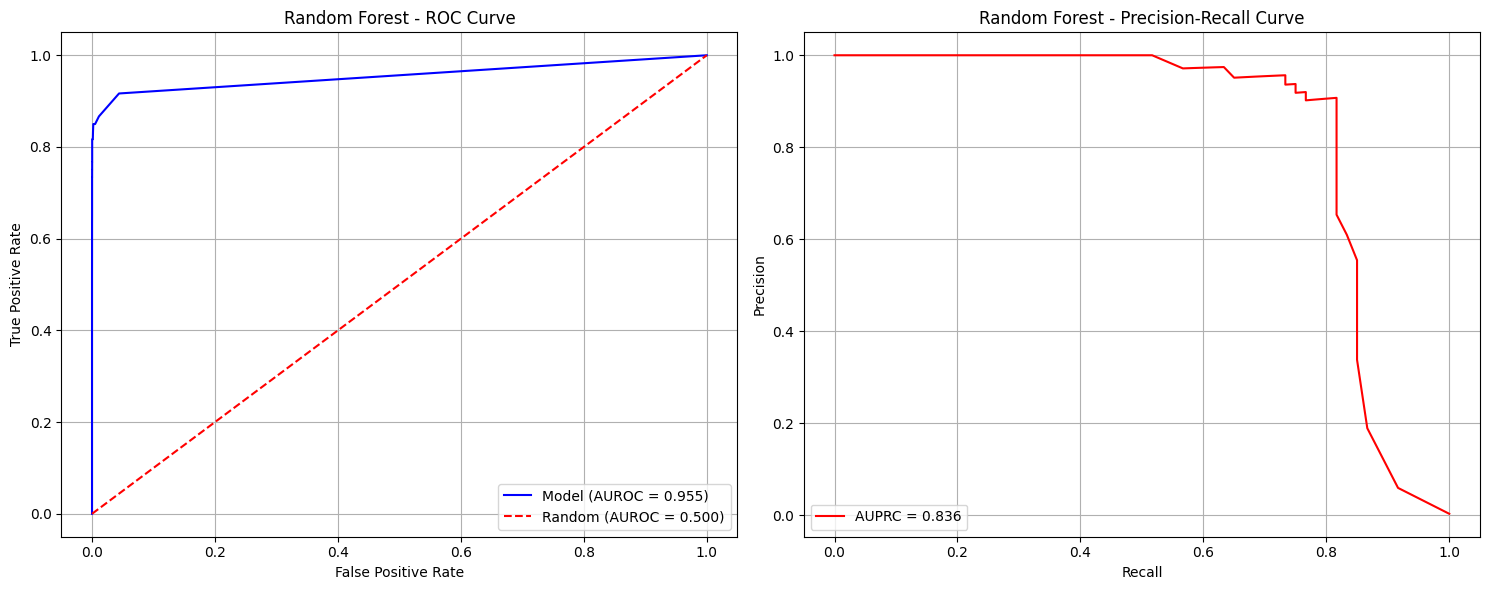


Random Forest:
AUROC: 0.9549
AUPRC: 0.8360


In [29]:
def get_model_probabilities(model, X_test, model_type='sklearn'):
    if model_type == 'nn':
        model.eval()
        with torch.no_grad():
            probs = model(torch.FloatTensor(X_test))
            return probs.numpy().squeeze()
    elif model_type == 'svm':
        return model.decision_function(X_test)
    else:
        return model.predict_proba(X_test)[:, 1]

nn_probs = get_model_probabilities(model, test_features_np, model_type='nn')
lr_probs = get_model_probabilities(lr_model, test_features_np)
svm_probs = get_model_probabilities(svm_model, test_features_np, model_type='svm')
rf_probs = get_model_probabilities(rf_model, test_features_np)

models = {
    'Neural Network': (nn_probs, 'nn'),
    'Logistic Regression': (lr_probs, 'sklearn'),
    'SVM': (svm_probs, 'svm'),
    'Random Forest': (rf_probs, 'sklearn')
}

# Plot individual figures for each model
for model_name, (probs, model_type) in models.items():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(Y_test_np, probs)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color='blue', label=f'Model (AUROC = {roc_auc:.3f})')
    ax1.plot([0, 1], [0, 1], 'r--', label='Random (AUROC = 0.500)')  # Random classifier line
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'{model_name} - ROC Curve')
    ax1.legend(loc='lower right')
    ax1.grid(True)

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(Y_test_np, probs)
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, color='red', label=f'AUPRC = {pr_auc:.3f}')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title(f'{model_name} - Precision-Recall Curve')
    ax2.legend(loc='lower left')
    ax2.grid(True)

    plt.tight_layout()
    # plt.savefig(f'./img/{model_name.lower().replace(" ", "_")}_curves.png')
    plt.show()

    print(f"\n{model_name}:")
    print(f"AUROC: {roc_auc:.4f}")
    print(f"AUPRC: {pr_auc:.4f}")

In [32]:
df_majority = X_train[Y_train.cpu().detach().numpy() == 0]  # Changed to filter rows
df_minority = X_train[Y_train.cpu().detach().numpy() == 1]  # Changed to filter rows

df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)

X_train_balanced = pd.concat([df_majority_downsampled, df_minority])
Y_train_balanced = pd.concat([pd.Series([0] * len(df_majority_downsampled)), pd.Series([1] * len(df_minority))])

# Shuffle the dataset
X_train_balanced, Y_train_balanced = shuffle(X_train_balanced, Y_train_balanced, random_state=42)

print("Training Logistic Regression on balanced data...")
lr_model_balanced = LogisticRegression(max_iter=2000, solver='saga', random_state=42)
lr_model_balanced.fit(X_train_balanced, Y_train_balanced)
lr_pred_balanced = lr_model_balanced.predict(X_test)

print("\nLogistic Regression Results on Balanced Data:")
print("Accuracy:", accuracy_score(Y_test, lr_pred_balanced))
print("\nClassification Report:")
print(classification_report(Y_test, lr_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, lr_pred_balanced))

svm_model_balanced = SVC(
    kernel='rbf',  # RBF kernel often works better for this type of data
    gamma='scale',
    C=100,  # Increase regularization parameter
    random_state=42
)
svm_model_balanced.fit(X_train_balanced, Y_train_balanced)
svm_pred_balanced = svm_model_balanced.predict(X_test)

print("\nSVM Results on Balanced Data:")
print("Accuracy:", accuracy_score(Y_test, svm_pred_balanced))
print("\nClassification Report:")
print(classification_report(Y_test, svm_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, svm_pred_balanced))

print("Training Random Forest on balanced data...")
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_train_balanced, Y_train_balanced)
rf_pred_balanced = rf_model_balanced.predict(X_test)

print("\nRandom Forest Results on Balanced Data:")
print("Accuracy:", accuracy_score(Y_test, rf_pred_balanced))
print("\nClassification Report:")
print(classification_report(Y_test, rf_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, rf_pred_balanced))


Training Logistic Regression on balanced data...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Logistic Regression Results on Balanced Data:
Accuracy: 0.9987437185929648

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.91      0.65      0.76        60

    accuracy                           1.00     19900
   macro avg       0.95      0.82      0.88     19900
weighted avg       1.00      1.00      1.00     19900


Confusion Matrix:
[[19836     4]
 [   21    39]]

SVM Results on Balanced Data:
Accuracy: 0.5682914572864322

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.72     19840
         1.0       0.00      0.40      0.01        60

    accuracy                           0.57     19900
   macro avg       0.50      0.48      0.36     19900
weighted avg       0.99      0.57      0.72     19900


Confusion Matrix:
[[11285  8555]
 [   36    24]]
Training Random Forest on balanced data...

Random Forest Resu

In [35]:
print(Y_train_balanced.shape)

train_features_balanced = StandardScaler().fit_transform(X_train_balanced)
train_features_balanced = torch.FloatTensor(train_features_balanced)

try:
  Y_train_balanced = torch.FloatTensor(Y_train_balanced.values)

except:
  Y_train_balanced = torch.FloatTensor(Y_train_balanced)

# input_dim = train_features_balanced.shape[1]

model = CreditCardNet(input_dim=input_dim, layer_sizes=[256, 128, 64, 32])
model.load_state_dict(torch.load('/content/best_credit_card_dnn_model.pth'))

model.eval()
with torch.no_grad():
    dnn_pred_balanced = model(torch.FloatTensor(test_features))
    dnn_pred_balanced = (dnn_pred_balanced > 0.5).float().squeeze().numpy()

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(Y_test, dnn_pred_balanced))
print("\nClassification Report:")
print(classification_report(Y_test, dnn_pred_balanced))




torch.Size([436])

Test Set Performance:
Accuracy: 0.9988944723618091

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.95      0.67      0.78        60

    accuracy                           1.00     19900
   macro avg       0.98      0.83      0.89     19900
weighted avg       1.00      1.00      1.00     19900



<ipython-input-35-9de6522f9af1>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_credit_card_dnn_model.pth'))


Performance Metrics for Models Trained on Balanced Data:


,Model,Accuracy,Precision,Recall,F1 Score
0,DNN,0.998894,0.952381,0.666667,0.784314
1,Logistic Regression,0.998744,0.906977,0.650000,0.757282
2,SVM,0.568291,0.002798,0.400000,0.005556
3,Random Forest,0.985779,0.161094,0.883333,0.272494



Best Model on Balanced Data: DNN
Accuracy: 0.9989
Precision: 0.9524
Recall: 0.6667
F1 Score: 0.7843


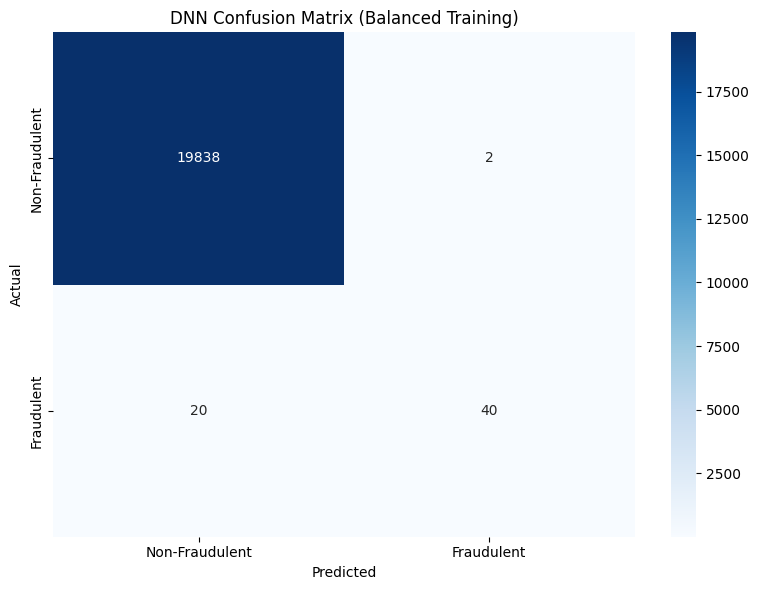

In [36]:
# Add DNN to the comparison table
balanced_models_comparison = pd.DataFrame({
    'Model': ['DNN', 'Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(Y_test, dnn_pred_balanced),
        accuracy_score(Y_test, lr_pred_balanced),
        accuracy_score(Y_test, svm_pred_balanced),
        accuracy_score(Y_test, rf_pred_balanced)
    ],
    'Precision': [
        precision_score(Y_test, dnn_pred_balanced),
        precision_score(Y_test, lr_pred_balanced),
        precision_score(Y_test, svm_pred_balanced),
        precision_score(Y_test, rf_pred_balanced)
    ],
    'Recall': [
        recall_score(Y_test, dnn_pred_balanced),
        recall_score(Y_test, lr_pred_balanced),
        recall_score(Y_test, svm_pred_balanced),
        recall_score(Y_test, rf_pred_balanced)
    ],
    'F1 Score': [
        f1_score(Y_test, dnn_pred_balanced),
        f1_score(Y_test, lr_pred_balanced),
        f1_score(Y_test, svm_pred_balanced),
        f1_score(Y_test, rf_pred_balanced)
    ]
})

# Format the table for better readability
balanced_models_comparison_styled = balanced_models_comparison.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1 Score': '{:.4f}'
})

print("Performance Metrics for Models Trained on Balanced Data:")
display(balanced_models_comparison)

best_balanced_model = balanced_models_comparison.loc[balanced_models_comparison['F1 Score'].idxmax()]
print(f"\nBest Model on Balanced Data: {best_balanced_model['Model']}")
print(f"Accuracy: {best_balanced_model['Accuracy']:.4f}")
print(f"Precision: {best_balanced_model['Precision']:.4f}")
print(f"Recall: {best_balanced_model['Recall']:.4f}")
print(f"F1 Score: {best_balanced_model['F1 Score']:.4f}")

dnn_cm_balanced = confusion_matrix(Y_test, dnn_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_cm_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('DNN Confusion Matrix (Balanced Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
# plt.savefig('./img/dnn_balanced_confusion_matrix.png')
plt.show()

Class weights for cost-sensitive learning: {0: 0.5013731245512151, 1: 182.5665137614679}

Training Cost-Sensitive Logistic Regression...

Cost-Sensitive Logistic Regression Results:
Accuracy: 0.9782914572864322

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     19840
         1.0       0.11      0.90      0.20        60

    accuracy                           0.98     19900
   macro avg       0.56      0.94      0.59     19900
weighted avg       1.00      0.98      0.99     19900


Confusion Matrix:
[[19414   426]
 [    6    54]]

Training Cost-Sensitive SVM...

Cost-Sensitive SVM Results:
Accuracy: 0.9987939698492462

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19840
         1.0       0.79      0.82      0.80        60

    accuracy                           1.00     19900
   macro avg       0.89      0.91      0.90     19900
we

,Model,Accuracy,Precision,Recall,F1 Score
0,DNN (Downsampled),0.998894,0.952381,0.666667,0.784314
1,DNN (Cost-Sensitive),0.996985,0.500000,0.916667,0.647059
2,Logistic Regression (Downsampled),0.998744,0.906977,0.650000,0.757282
3,Logistic Regression (Cost-Sensitive),0.978291,0.112500,0.900000,0.200000
4,SVM (Downsampled),0.568291,0.002798,0.400000,0.005556
5,SVM (Cost-Sensitive),0.998794,0.790323,0.816667,0.803279
6,Random Forest (Downsampled),0.985779,0.161094,0.883333,0.272494
7,Random Forest (Cost-Sensitive),0.999095,0.937500,0.750000,0.833333



Comparison: All Models Sorted by F1 Score:


,Model,Accuracy,Precision,Recall,F1 Score
7,Random Forest (Cost-Sensitive),0.999095,0.937500,0.750000,0.833333
5,SVM (Cost-Sensitive),0.998794,0.790323,0.816667,0.803279
0,DNN (Downsampled),0.998894,0.952381,0.666667,0.784314
2,Logistic Regression (Downsampled),0.998744,0.906977,0.650000,0.757282
1,DNN (Cost-Sensitive),0.996985,0.500000,0.916667,0.647059
6,Random Forest (Downsampled),0.985779,0.161094,0.883333,0.272494
3,Logistic Regression (Cost-Sensitive),0.978291,0.112500,0.900000,0.200000
4,SVM (Downsampled),0.568291,0.002798,0.400000,0.005556



Best Overall Model: Random Forest (Cost-Sensitive)
Accuracy: 0.9991
Precision: 0.9375
Recall: 0.7500
F1 Score: 0.8333


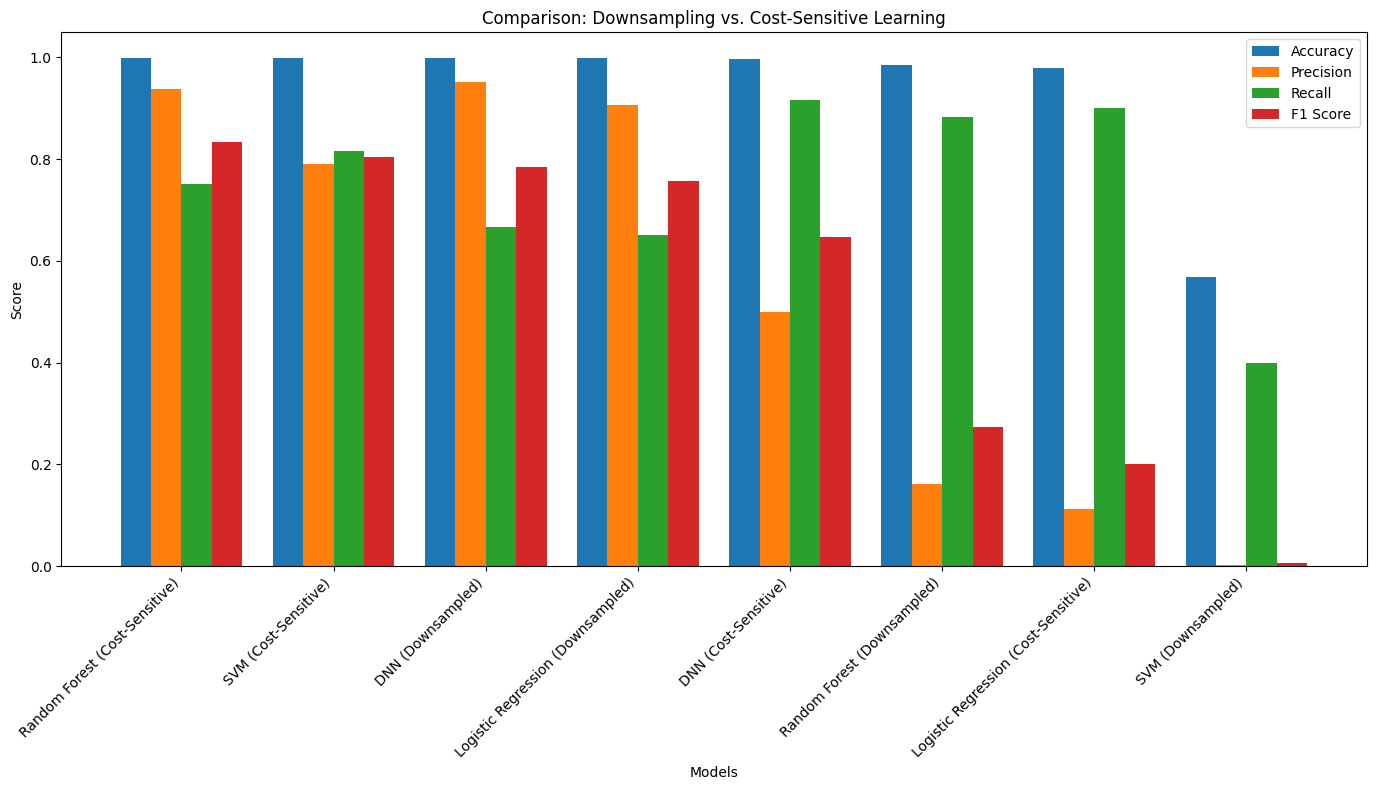

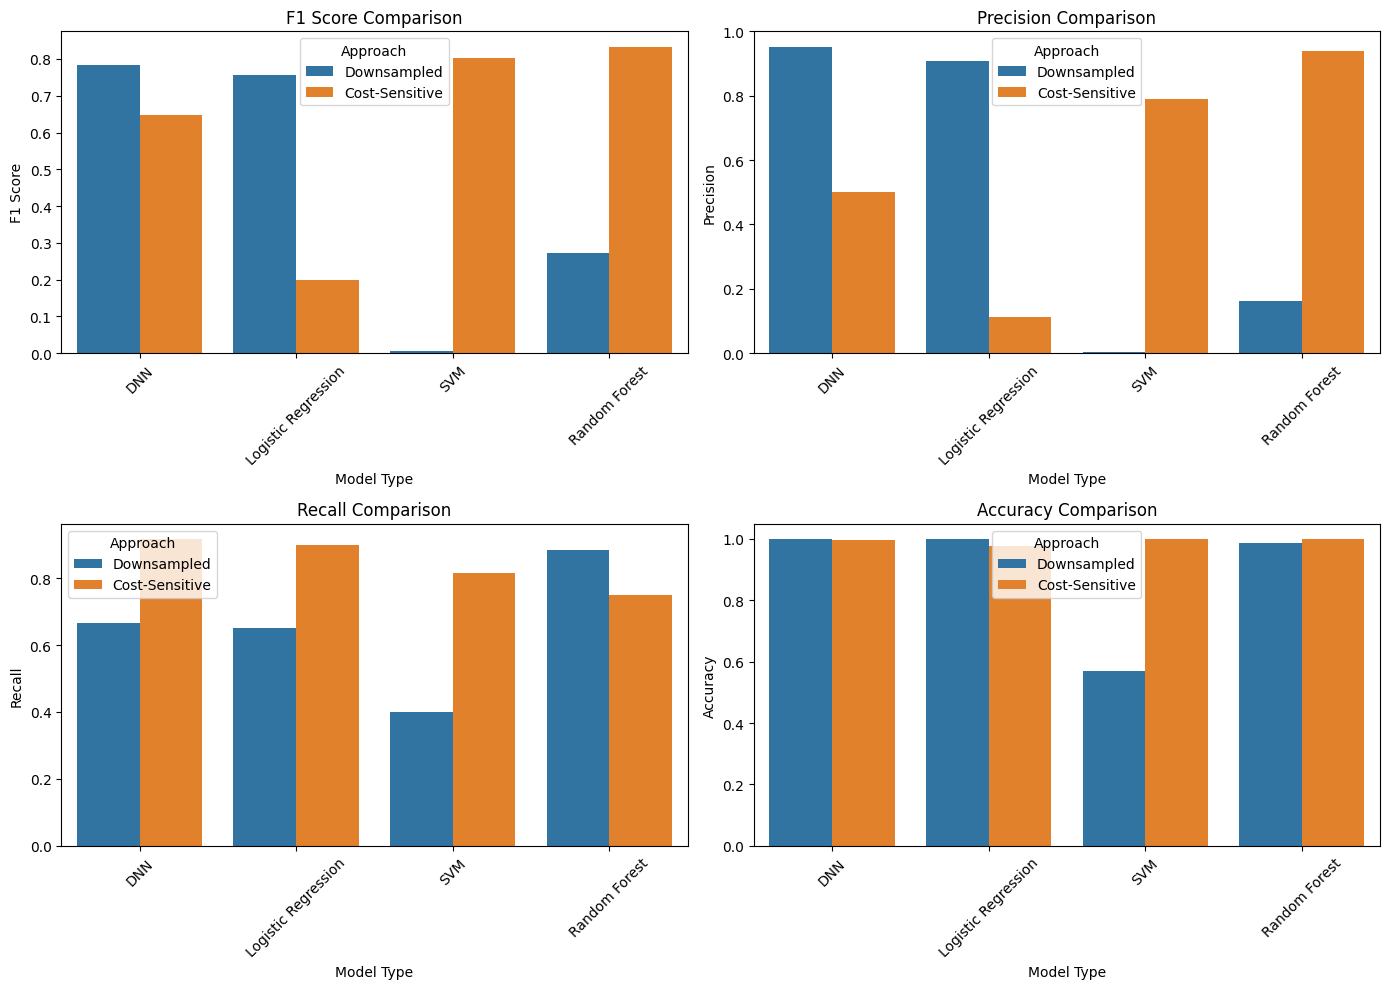

In [38]:
# Calculate class weights for cost-sensitive learning
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train.cpu().numpy()),
    y=Y_train.cpu().numpy()
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"Class weights for cost-sensitive learning: {class_weight_dict}")

# 1. Logistic Regression with Cost-Sensitive Learning
print("\nTraining Cost-Sensitive Logistic Regression...")
lr_model_cost = LogisticRegression(max_iter=2000, solver='saga', class_weight='balanced', random_state=42)
lr_model_cost.fit(train_features, Y_train)
lr_pred_cost = lr_model_cost.predict(test_features)

print("\nCost-Sensitive Logistic Regression Results:")
print("Accuracy:", accuracy_score(Y_test, lr_pred_cost))
print("\nClassification Report:")
print(classification_report(Y_test, lr_pred_cost))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, lr_pred_cost))

# 2. SVM with Cost-Sensitive Learning
print("\nTraining Cost-Sensitive SVM...")
svm_model_cost = SVC(kernel='rbf', gamma='scale', class_weight='balanced', random_state=42)
svm_model_cost.fit(train_features, Y_train)
svm_pred_cost = svm_model_cost.predict(test_features)

print("\nCost-Sensitive SVM Results:")
print("Accuracy:", accuracy_score(Y_test, svm_pred_cost))
print("\nClassification Report:")
print(classification_report(Y_test, svm_pred_cost))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, svm_pred_cost))

# 3. Random Forest with Cost-Sensitive Learning
print("\nTraining Cost-Sensitive Random Forest...")
rf_model_cost = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model_cost.fit(train_features, Y_train)
rf_pred_cost = rf_model_cost.predict(test_features)

print("\nCost-Sensitive Random Forest Results:")
print("Accuracy:", accuracy_score(Y_test, rf_pred_cost))
print("\nClassification Report:")
print(classification_report(Y_test, rf_pred_cost))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, rf_pred_cost))

# 4. Cost-sensitive DNN (using weighted loss function)
print("\nTraining Cost-Sensitive DNN...")

# Define a custom weighted loss function for PyTorch
class WeightedBCELoss(nn.Module):
    def __init__(self, weight_for_1=10.0):
        super(WeightedBCELoss, self).__init__()
        self.weight_for_1 = weight_for_1

    def forward(self, outputs, targets):
        # Standard BCE loss
        loss = nn.BCELoss(reduction='none')(outputs, targets.unsqueeze(1))

        # Apply weights based on the target class
        weights = torch.ones_like(targets)
        weights[targets == 1] = self.weight_for_1

        # Apply weights and take mean
        weighted_loss = (loss.squeeze() * weights).mean()
        return weighted_loss

# Function to train cost-sensitive DNN
def train_cost_sensitive_dnn(model, train_features, Y_train, test_features, Y_test,
                            weight_for_1=10.0, epochs=50, batch_size=128):
    criterion = WeightedBCELoss(weight_for_1=weight_for_1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_dataset = torch.utils.data.TensorDataset(
        torch.FloatTensor(train_features),
        torch.FloatTensor(Y_train)
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    history = {
        'train_loss': [],
        'test_loss': [],
        'train_acc': [],
        'test_acc': []
    }

    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

            predicted = (outputs > 0.5).float().squeeze()
            train_correct += (predicted == batch_y).sum().item()
            train_total += batch_y.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = train_correct / train_total

        # Testing phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.FloatTensor(test_features))
            test_loss = criterion(test_outputs, torch.FloatTensor(Y_test))
            test_predicted = (test_outputs > 0.5).float().squeeze()
            test_accuracy = (test_predicted == torch.FloatTensor(Y_test)).sum().item() / len(Y_test)

        history['train_loss'].append(avg_train_loss)
        history['test_loss'].append(test_loss.item())
        history['train_acc'].append(train_accuracy)
        history['test_acc'].append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
            print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

    # Get final predictions
    model.eval()
    with torch.no_grad():
        final_outputs = model(torch.FloatTensor(test_features))
        final_predictions = (final_outputs > 0.5).float().squeeze().numpy()

    history['final_predictions'] = final_predictions
    return history

dnn_model_cost = CreditCardNet(input_dim=train_features_np.shape[1], layer_sizes=[256, 128, 64, 32])
pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])
print(f"Positive class weight for cost-sensitive DNN: {pos_weight:.2f}")

history_cost = train_cost_sensitive_dnn(
    dnn_model_cost,
    train_features_np,
    Y_train_np,
    test_features_np,
    Y_test_np,
    weight_for_1=pos_weight,
    epochs=50
)


dnn_pred_cost = history_cost['final_predictions']

print("\nCost-Sensitive DNN Results:")
print("Accuracy:", accuracy_score(Y_test, dnn_pred_cost))
print("\nClassification Report:")
print(classification_report(Y_test, dnn_pred_cost))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, dnn_pred_cost))

comparison_table = pd.DataFrame({
    'Model': [
        'DNN (Downsampled)',
        'DNN (Cost-Sensitive)',
        'Logistic Regression (Downsampled)',
        'Logistic Regression (Cost-Sensitive)',
        'SVM (Downsampled)',
        'SVM (Cost-Sensitive)',
        'Random Forest (Downsampled)',
        'Random Forest (Cost-Sensitive)'
    ],
    'Accuracy': [
        accuracy_score(Y_test, dnn_pred_balanced),
        accuracy_score(Y_test, dnn_pred_cost),
        accuracy_score(Y_test, lr_pred_balanced),
        accuracy_score(Y_test, lr_pred_cost),
        accuracy_score(Y_test, svm_pred_balanced),
        accuracy_score(Y_test, svm_pred_cost),
        accuracy_score(Y_test, rf_pred_balanced),
        accuracy_score(Y_test, rf_pred_cost)
    ],
    'Precision': [
        precision_score(Y_test, dnn_pred_balanced),
        precision_score(Y_test, dnn_pred_cost),
        precision_score(Y_test, lr_pred_balanced),
        precision_score(Y_test, lr_pred_cost),
        precision_score(Y_test, svm_pred_balanced),
        precision_score(Y_test, svm_pred_cost),
        precision_score(Y_test, rf_pred_balanced),
        precision_score(Y_test, rf_pred_cost)
    ],
    'Recall': [
        recall_score(Y_test, dnn_pred_balanced),
        recall_score(Y_test, dnn_pred_cost),
        recall_score(Y_test, lr_pred_balanced),
        recall_score(Y_test, lr_pred_cost),
        recall_score(Y_test, svm_pred_balanced),
        recall_score(Y_test, svm_pred_cost),
        recall_score(Y_test, rf_pred_balanced),
        recall_score(Y_test, rf_pred_cost)
    ],
    'F1 Score': [
        f1_score(Y_test, dnn_pred_balanced),
        f1_score(Y_test, dnn_pred_cost),
        f1_score(Y_test, lr_pred_balanced),
        f1_score(Y_test, lr_pred_cost),
        f1_score(Y_test, svm_pred_balanced),
        f1_score(Y_test, svm_pred_cost),
        f1_score(Y_test, rf_pred_balanced),
        f1_score(Y_test, rf_pred_cost)
    ]
})

comparison_table_styled = comparison_table.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1 Score': '{:.4f}'
})


print("\nComparison: Downsampling vs. Cost-Sensitive Learning (Grouped by Model):")
display(comparison_table)

print("\nComparison: All Models Sorted by F1 Score:")
display(comparison_table.sort_values('F1 Score', ascending=False))

best_model = comparison_table.loc[comparison_table['F1 Score'].idxmax()]
print(f"\nBest Overall Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")

plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
bar_width = 0.2
index = np.arange(len(comparison_table))

# Sort the dataframe by F1 Score for better visualization
sorted_comparison = comparison_table.sort_values('F1 Score', ascending=False)

for i, metric in enumerate(metrics):
    plt.bar(index + i*bar_width, sorted_comparison[metric], bar_width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison: Downsampling vs. Cost-Sensitive Learning')
plt.xticks(index + bar_width*1.5, sorted_comparison['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
# plt.savefig('./img/downsampling_vs_cost_sensitive.png')
plt.show()

plt.figure(figsize=(14, 10))

model_types = ['DNN', 'Logistic Regression', 'SVM', 'Random Forest']
approaches = ['Downsampled', 'Cost-Sensitive']

reshaped_data = []

for model_type in model_types:
    for approach in approaches:
        model_name = f"{model_type} ({approach})"
        row = comparison_table[comparison_table['Model'] == model_name].iloc[0]
        reshaped_data.append({
            'Model Type': model_type,
            'Approach': approach,
            'Accuracy': row['Accuracy'],
            'Precision': row['Precision'],
            'Recall': row['Recall'],
            'F1 Score': row['F1 Score']
        })

reshaped_df = pd.DataFrame(reshaped_data)

plt.subplot(2, 2, 1)
sns.barplot(x='Model Type', y='F1 Score', hue='Approach', data=reshaped_df)
plt.title('F1 Score Comparison')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='Model Type', y='Precision', hue='Approach', data=reshaped_df)
plt.title('Precision Comparison')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x='Model Type', y='Recall', hue='Approach', data=reshaped_df)
plt.title('Recall Comparison')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x='Model Type', y='Accuracy', hue='Approach', data=reshaped_df)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
# plt.savefig('./img/approach_comparison_by_model.png')
plt.show()